In [1]:
import numpy as np
from pathlib import Path

from pymor.basic import *
from pymor.core.pickle import load

from RBInvParam.problems.problems import build_InstationaryModelIP

set_log_levels({
    'pymor' : 'WARN'
})

set_defaults({})


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cm",
    "font.size": 10,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    'figure.dpi': 400
})

In [24]:
#WORK_DIR = Path('/run/media/benedikt/38E84473425D444F/Dokumente/Studium/Mathematik/PhD/parabolische_inverse_probleme')
WORK_DIR = Path('/home/benedikt/Dokumente/parabolische_inverse_probleme')

method = 'FOM_IRGNM'
#dump_path = WORK_DIR / Path('examples/diffusion/dumps') / f'20250203_153616_TR_IRGNM'
dump_path = WORK_DIR / Path('experiments/initial_testing') / f'reaction_FOM_100'

setup_path = dump_path / 'setup.pkl'
optimizer_parameter_path = dump_path / 'optimizer_parameter.pkl'
data_path = dump_path / f'{method}_final.pkl'
final_data_path = dump_path / f'{method}_final.pkl'

with open(setup_path, 'rb') as file:
    setup = load(file)

with open(optimizer_parameter_path, 'rb') as file:
    optimizer_parameter = load(file)

if not 'FOM' in locals():
    FOM = build_InstationaryModelIP(setup=setup)

q_exact = setup['model_parameter']['q_exact']

with open(data_path, 'rb') as file:
    data = load(file)


if final_data_path.exists():
    with open(final_data_path, 'rb') as file:
        final_data = load(file)

In [25]:
optimizer_parameter

{'method': 'FOM_IRGNM',
 'q_0': array([[3., 3., 3., ..., 3., 3., 3.]]),
 'alpha_0': 1e-05,
 'tol': 1e-14,
 'tau': 3.5,
 'noise_level': 1e-05,
 'theta': 0.4,
 'Theta': 1.95,
 'i_max': 75,
 'reg_loop_max': 10,
 'i_max_inner': 2,
 'lin_solver_parms': {'lin_solver_max_iter': 10000.0,
  'lin_solver_tol': 1e-12,
  'lin_solver_inital_step_size': 1},
 'use_cached_operators': True}

In [23]:
setup

{'dims': {'N': 100,
  'nt': 50,
  'fine_N': None,
  'state_dim': 10201,
  'fine_state_dim': 40401,
  'diameter': 0.01414213562373095,
  'fine_diameter': 0.007071067811865475,
  'par_dim': 10201,
  'output_dim': 1},
 'problem_parameter': {'N': 100,
  'contrast_parameter': 2,
  'parameter_location': 'reaction',
  'boundary_conditions': 'dirichlet',
  'exact_parameter': 'Kirchner',
  'T_final': 1},
 'model_parameter': {'name': 'reaction_FOM',
  'problem_type': 'reaction dirichlet Kirchner P1',
  'T_initial': 0,
  'T_final': 1,
  'delta_t': 0.02,
  'noise_percentage': None,
  'noise_level': 1e-05,
  'q_circ': array([[3., 3., 3., ..., 3., 3., 3.]]),
  'q_exact': NumpyVectorArray(
      NumpyVectorSpace(10201, id='PARAM'),
      [[3.         3.         3.         ... 3.00313381 3.00248892 3.00196413]],
      _len=1),
  'q_time_dep': False,
  'riesz_rep_grad': True,
  'bounds': [array([0.001, 0.001, 0.001, ..., 0.001, 0.001, 0.001]),
   array([1000., 1000., 1000., ..., 1000., 1000., 1000.])],

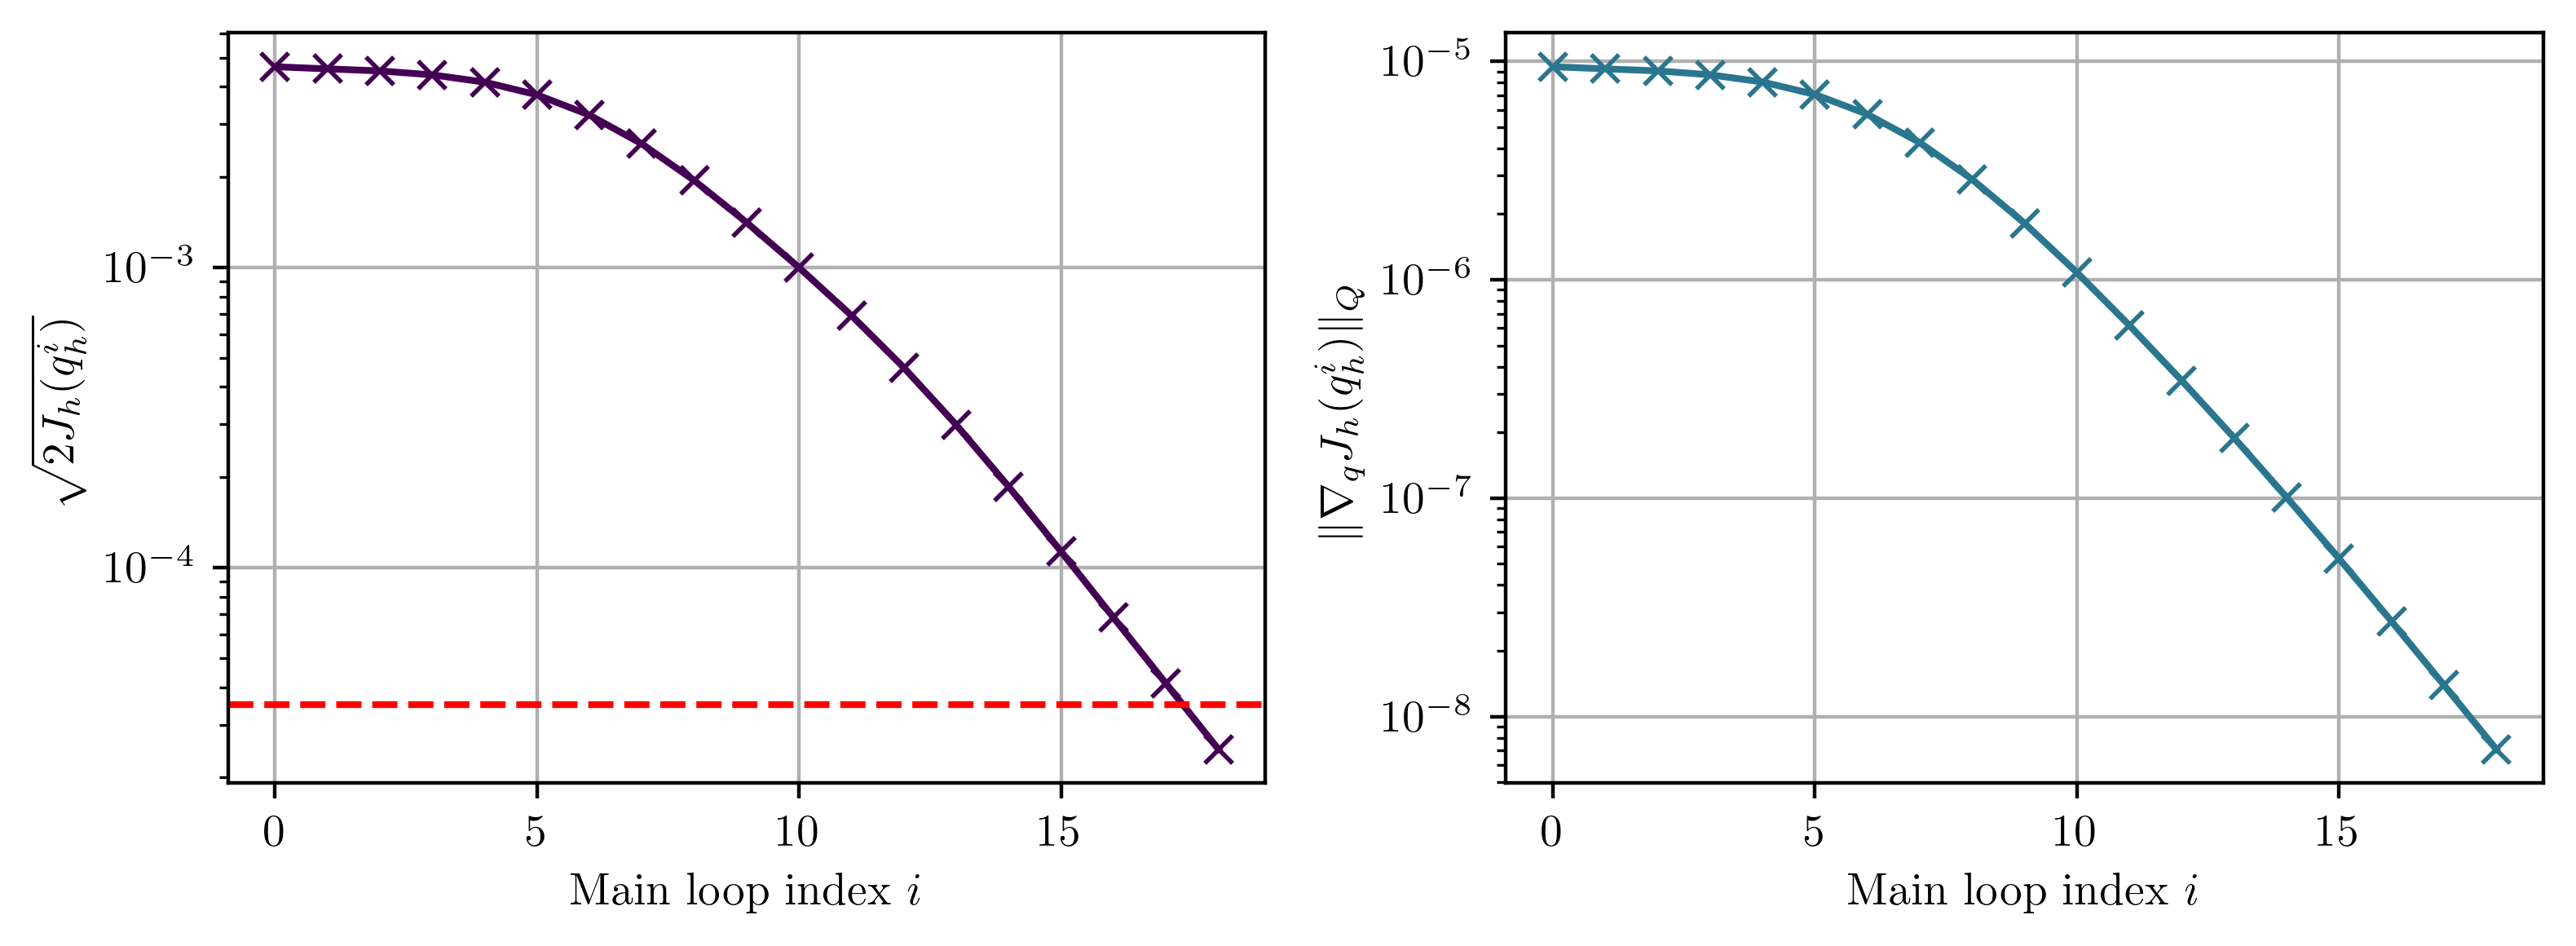

In [27]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8,3))
cmap = plt.get_cmap('viridis')

Js = np.array(data['J'])
norm_nabla_Js = np.array(data['norm_nabla_J'])
assert len(Js) == len(norm_nabla_Js)

ax[0].set_xlabel(r'$\textrm{Main loop index } i$')
ax[0].set_ylabel(r'$\sqrt{2J_h(q^i_h)}$')
ax[0].set_yscale('log')
ax[0].grid()
ax[0].plot(np.sqrt(2 * Js), marker='x',color=cmap(0))

tau = optimizer_parameter['tau']
noise_level = optimizer_parameter['noise_level']
tol = optimizer_parameter['tol']
y = tau * noise_level + tol
ax[0].axhline(y=y, color='r', linestyle='--')


ax[1].set_xlabel(r'$\textrm{Main loop index } i$')
if setup['model_parameter']['q_time_dep']:
    ax[1].set_ylabel(r'$\|\nabla_q J_h(q^i_h)\|_{Q^{K}}$')
else:
    ax[1].set_ylabel(r'$\|\nabla_q J_h(q^i_h)\|_{Q}$')
    
ax[1].set_yscale('log')
ax[1].grid()
ax[1].plot(norm_nabla_Js, marker='x',color=cmap(100))
##############################


plt.tight_layout()
plt.show()

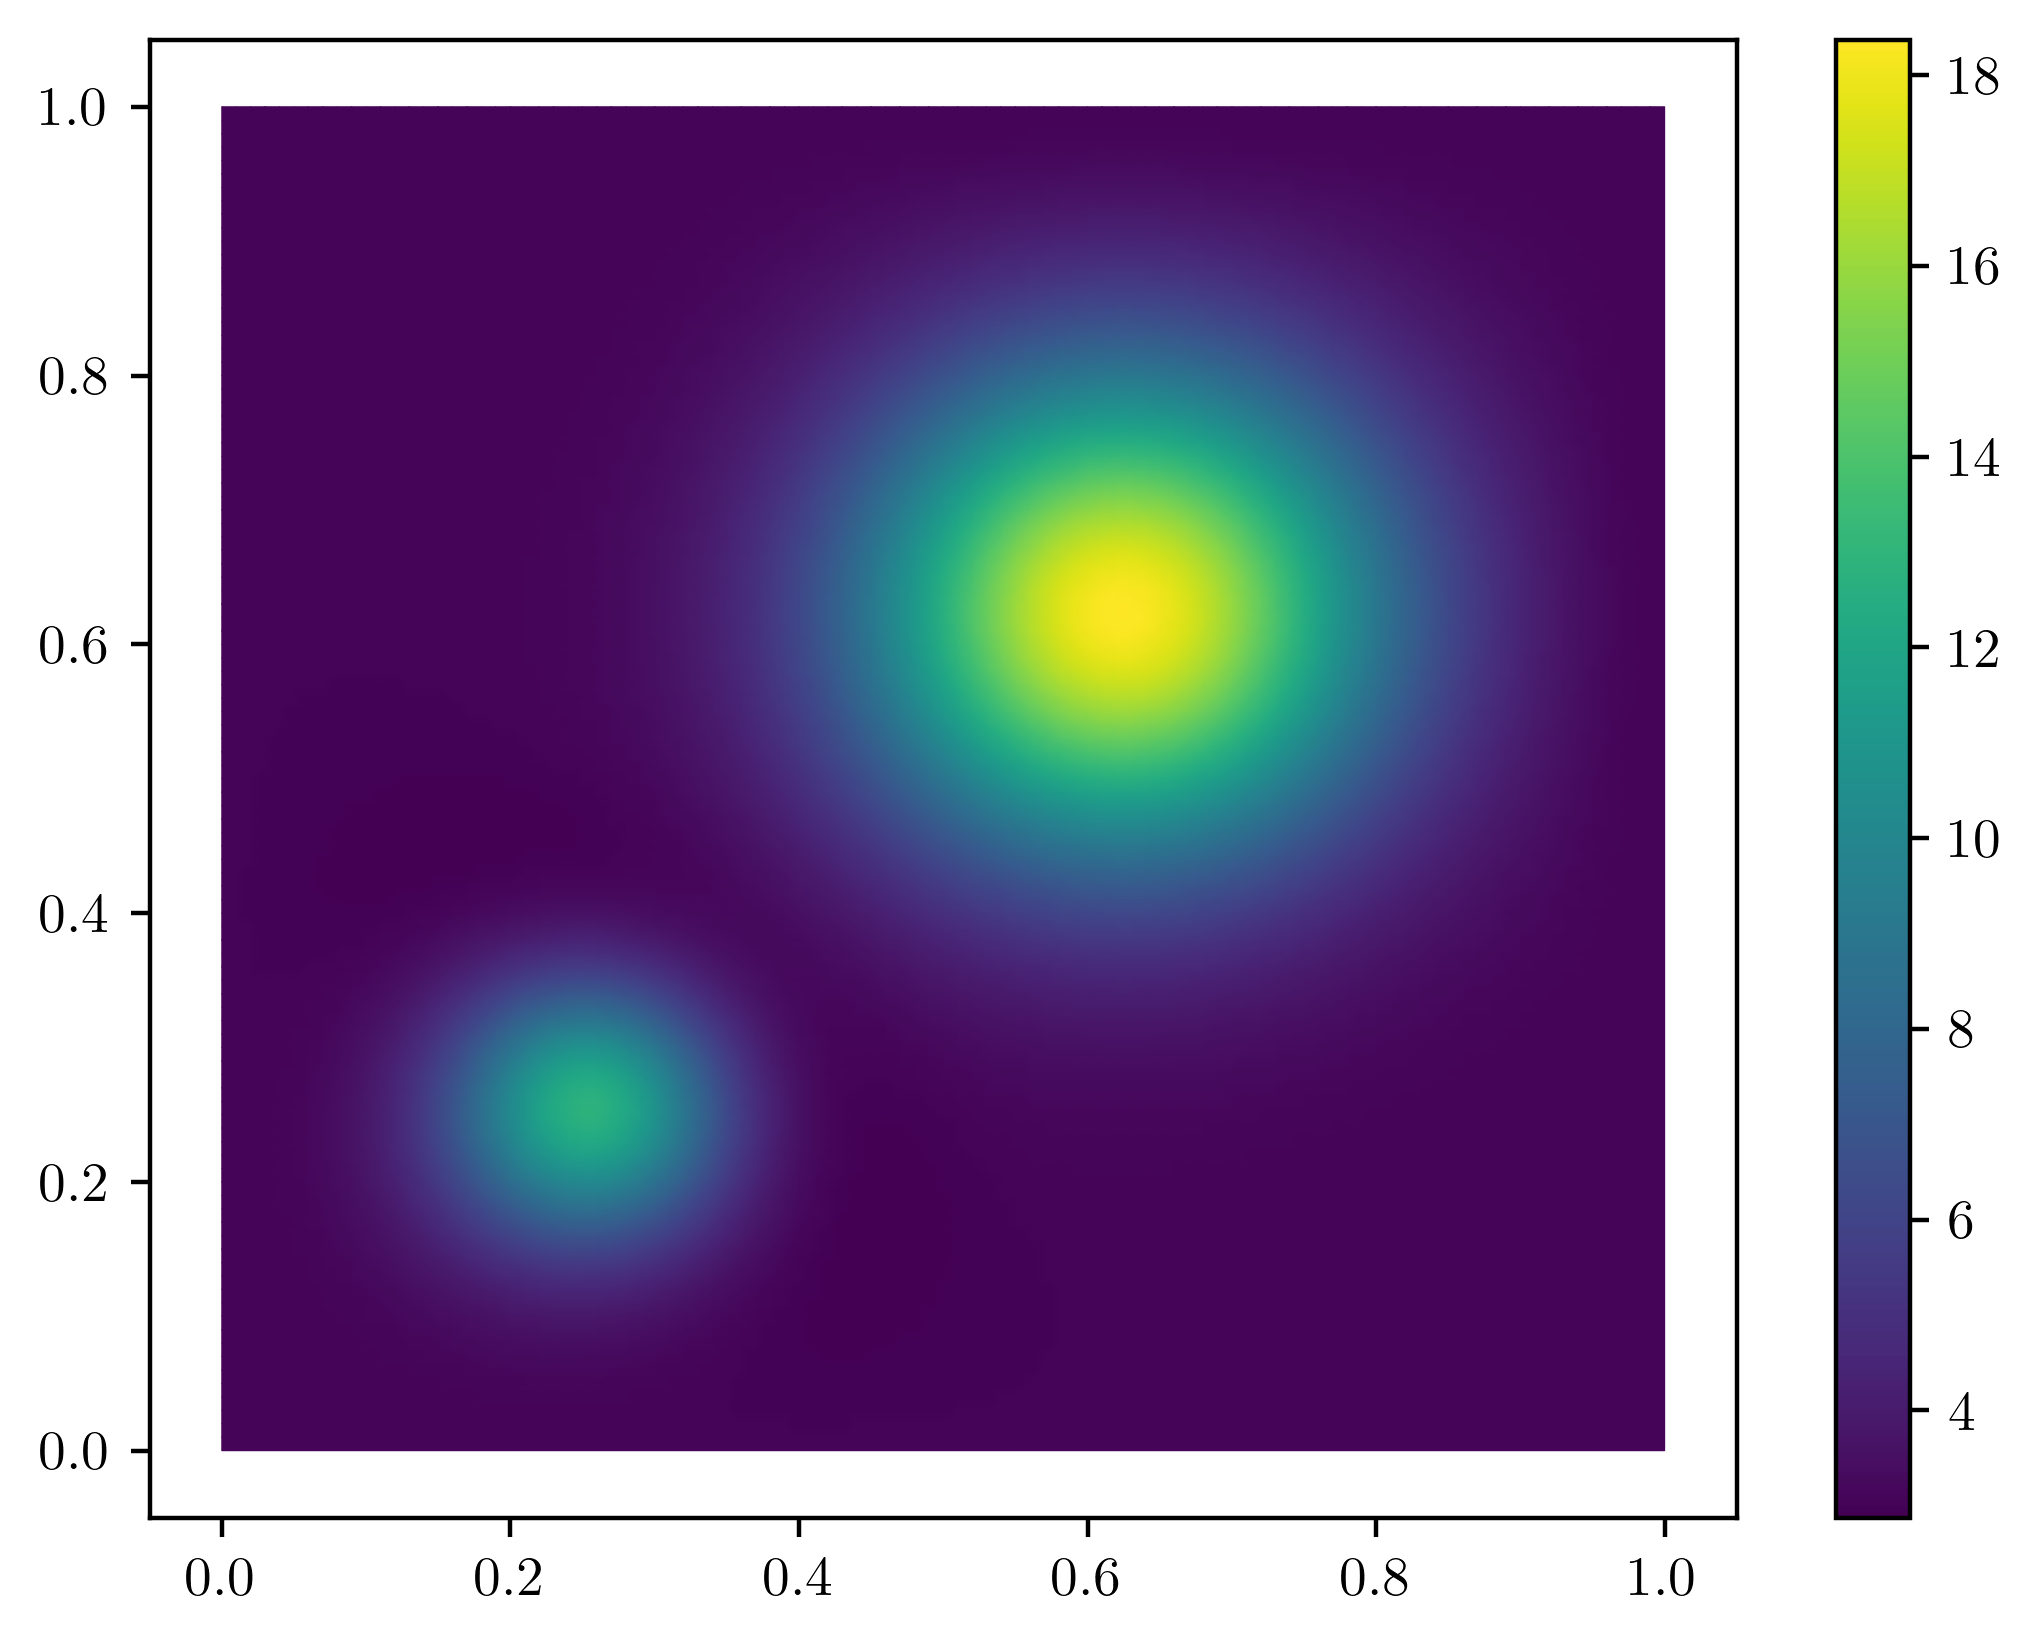

In [19]:
FOM.visualizer.visualize(data['q'][-1])

In [21]:
data['total_runtime']

7162.783480386999